In [9]:
import numpy as np
def otsu_thresholding(img1):
    
    #Kopie des Bildes machen und glätten
    imgT = img1.copy()
    rvl = img1.ravel()

    #range und numerische Werte des Histogramms definieren
    ran = round(max(rvl) - min(rvl))
    counts, bins = np.histogram(rvl,bins = ran)
 
    #leere Liste für alle within class variances erstellen
    variance_list = list()
    var_obj_list = list()
    var_back_list = list()

    # optimalen threshhold herausfinden
    for T in range(1,len(counts)):
        
        #within class variance herausfinden
        
        #definieren von w0 und Hintergrund Mittelwert
        sum_back = 0 
        mean_sum_back = 0
        for i in range(0,T):
            sum_back += counts[i]
            mean_sum_back += counts[i] * bins[i]

        w0 = sum_back / sum(counts)
        mean_back = mean_sum_back / sum_back


        #definieren von w1 und Vordergrund Mittelwert
        sum_obj = 0
        mean_sum_obj = 0

        for j in range(T,len(counts)):
            sum_obj += counts[j]
            mean_sum_obj += counts[j] * bins[j]

        w1 = sum_obj / sum(counts)
        mean_obj = mean_sum_obj / sum_obj

        #Varianz Hintergrund
        var_sum_back = 0
        for k in range(0, T):
            var_sum_back += counts[k] * (bins[k] - mean_back)**2 

        var_back = var_sum_back / sum_back

        #Varianz Vordergrund
        var_sum_obj = 0
        for l in range(T, len(counts)):
            var_sum_obj += counts[l] * (bins[l] - mean_obj)**2 

        var_obj = var_sum_obj / sum_obj

        # Within Class Varianz berechnen
        within_class_varianz = w0 * var_back + w1 * var_obj
        
        #within class variance zu Liste hinzufügen
        variance_list.append(within_class_varianz)

        ####
        var_obj_list.append(var_obj)
        var_back_list.append(var_back)
    print(var_back_list)
    
    #minimalen Wert für T aussuchen 
    minvar = min(variance_list)
    for m in range(0,len(variance_list)):
        if variance_list[m] == minvar: 
            THRESH = round(bins[m])

    print(minvar)
    print(THRESH)
    #intensitätswerte anpassen
    for p in np.ndindex(imgT.shape):
        if img1[p] < THRESH:
            imgT[p] = 0
        else:
            imgT[p] = 255
    return imgT

[0.0, 0.000721500345371372, 0.010821576918807332, 0.15761498373951957, 0.42056534622316405, 0.597283094810704, 0.7376033570229524, 0.8829657800037326, 1.0407988182412833, 1.228761360408263, 1.465334417035732, 1.7848695687897564, 2.247019337219144, 2.9527300525859057, 3.9982332769511566, 5.439255026207009, 7.245889777546207, 9.430542940440402, 11.869290104266435, 14.438863031123468, 16.948754393167253, 19.376710943370878, 21.59183514576905, 23.582439124592657, 25.37851665392438, 27.022241183339485, 28.549794538317453, 29.979134860362702, 31.35149939168159, 32.623267343241885, 33.78053438010735, 34.883338410912934, 35.8655865717987, 36.77447893116315, 37.54108042106026, 38.24349881892978, 38.880469588217636, 39.47528287321022, 40.000377618404734, 40.487419620116114, 40.93591212813122, 41.38056049314633, 41.76132927400466, 42.11773925424721, 42.42400639365199, 42.70411851300712, 42.995645534680634, 43.23826973028788, 43.445857335738836, 43.64798449730674, 43.84612806671962, 44.01492218141

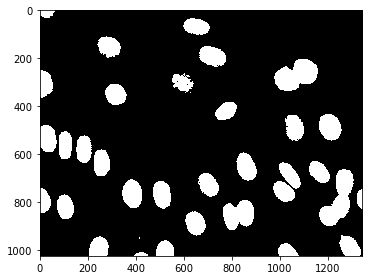

In [10]:
from skimage import io
img1 = io.imread('../BilderDaten/BilderDaten/NIH3T3/img/dna-0.png')
io.imshow(otsu_thresholding(img1))

In [11]:
#otsu vektorisiert
import numpy as np

def otsu_thresholding_vek(img1):
    
    #Kopie des Bildes machen und glätten
    imgT = img1.copy()
    rvl = img1.ravel()

    #range und numerische Werte des Histogramms definieren
    ran = round(max(rvl) - min(rvl))
    counts, bins = np.histogram(rvl,bins = ran)
 
    sum_back = np.cumsum(counts)[:-1]
    sum_obj = sum(counts)-sum_back
    mean_back = np.cumsum(bins[:-2]*counts[:-1])/sum_back
    mean_obj = (sum(bins[:-2]*counts[:-1])-np.cumsum(bins[:-2]*counts[:-1]))/sum_obj
    w0_list = sum_back/sum(counts)
    w1_list = 1 - w0_list

    #calculate background and foreground variance
    var_back_list = list()
    var_obj_list = list()
    for i in range (0,len(mean_back)):
        var_back = sum(counts[:i]*(bins[:i]-mean_back[i])**2)/sum_back[i]
        var_back_list.append(var_back)
        var_obj = sum(counts[i:]*(bins[i:-1]-mean_obj[i])**2)/sum_obj[i]
        var_obj_list.append(var_obj)
    ####
    print(var_back_list)
    
        
    wcv_list = (w0_list * var_back_list) + (w1_list * var_obj_list)
    minvar = min(wcv_list)
    print(minvar)
    for m in range(0,len(wcv_list)):
        if wcv_list[m] == minvar: 
            THRESH = round(bins[m])
    print(THRESH)
    #intensitätswerte anpassen
    for p in np.ndindex(imgT.shape):
        if img1[p] < THRESH:
            imgT[p] = 0
        else:
            imgT[p] = 255
    return imgT

[0.0, 0.0007209794064938475, 0.010703520632684996, 0.12846737973628, 0.21100807729268686, 0.40572369590808643, 0.5874738642490015, 0.7306007824488784, 0.8772329943292929, 1.0353713846753394, 1.2230298449066328, 1.458575123415595, 1.7760199711022522, 2.2343012632520716, 2.9334006167648328, 3.967908636055961, 5.392449321633386, 7.1765200635328705, 9.335213822362938, 11.749262017750947, 14.303054485707603, 16.804091337824392, 19.235335273613295, 21.46024017659642, 23.462632985263365, 25.269889141252108, 26.923398212142263, 28.459870065760605, 29.895663411841262, 31.276730128431982, 32.55767276524354, 33.7205648079792, 34.83201274896626, 35.82012982013486, 36.737736366329216, 37.50897548525385, 38.21573710723924, 38.8557669739161, 39.45447659282057, 39.98198457166792, 40.471266607947754, 40.92064349440967, 41.36805778214369, 41.75015208692797, 42.10855305696559, 42.41597484415081, 42.69612979512588, 42.989272361865225, 43.23304469649706, 43.44098424922533, 43.64340452486163, 43.84238164952

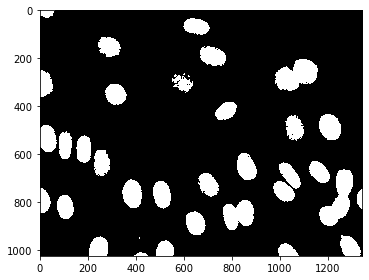

In [12]:
from skimage import io
img1 = io.imread('../BilderDaten/BilderDaten/NIH3T3/img/dna-0.png')
io.imshow(otsu_thresholding_vek(img1))